# **Task 3**

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

In [72]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Load the dataset
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [74]:
# Check for missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [75]:
# checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [76]:
# Convert categorical variables to numerical (using pd.get_dummies for one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

In [77]:
# Check the distribution of the target variable
df.iloc[:,-1].value_counts()

,count
deposit_yes,
False,5873
True,5289


In [78]:
# Split the dataset into features and target variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [80]:
# Build the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [81]:
# Make predictions
y_pred = model.predict(X_test)

In [82]:
# Evaluate the model
print(accuracy_score(y_test, y_pred))

0.7823230815168707


In [83]:
print(confusion_matrix(y_test, y_pred))

[[1394  366]
 [ 363 1226]]


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.79      0.79      1760
        True       0.77      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



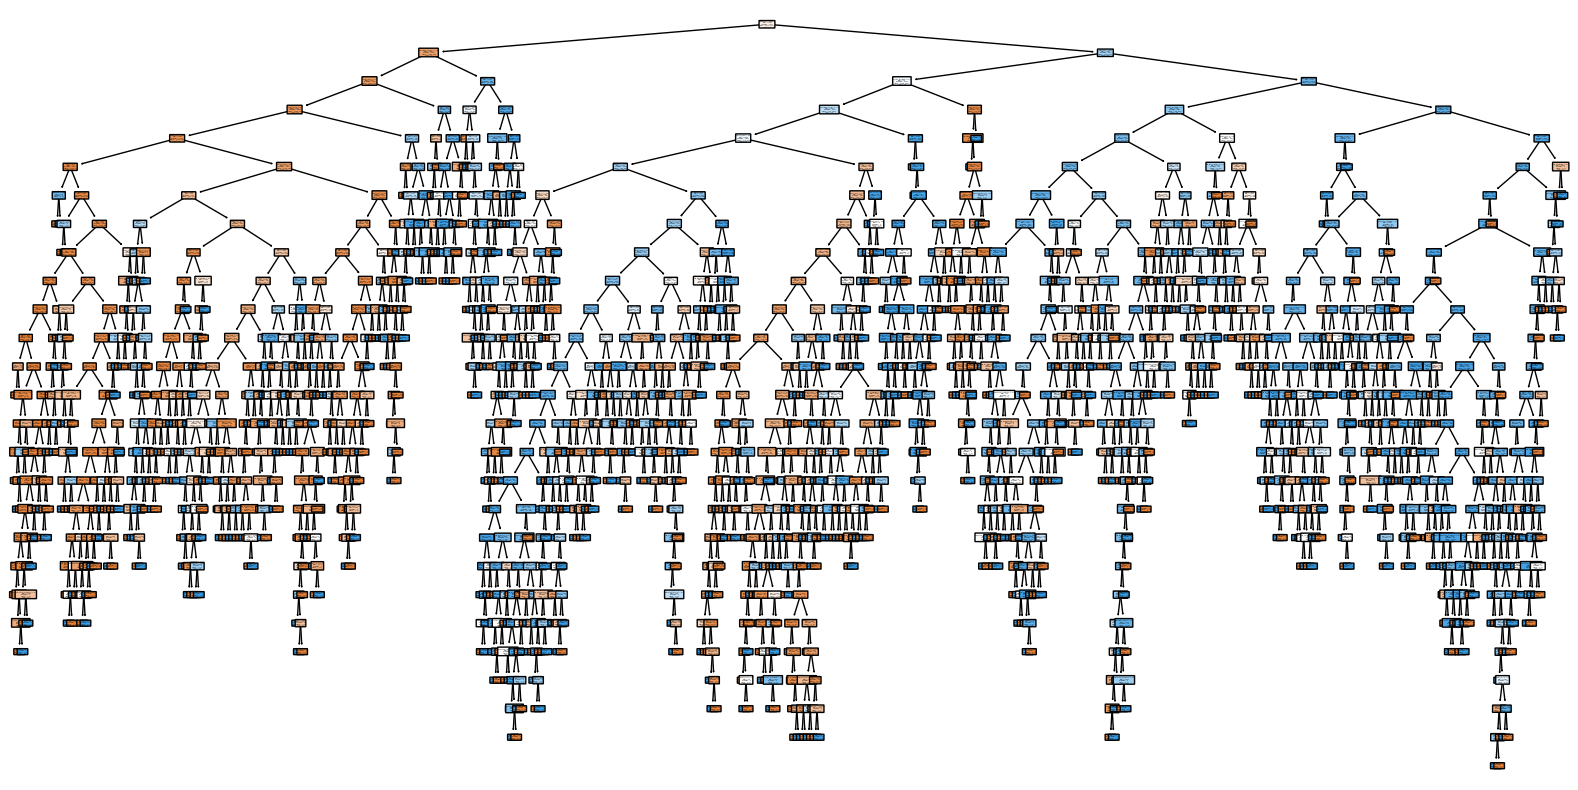

In [85]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=x.columns, class_names=['No', 'Yes'], rounded=True, fontsize=1)
plt.show()